## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data sci libraries in
an attempt to build a machine learning model capable of predicting whether ot not someone has heart 
disease based  on their medical attributes

We're going to take the following approcach:
1. Problem definition
2. Data 
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data
The orignal data came from Cleavland data from UCI.

## 3. Evaluation

> If we can reach 95% accuracy at prediciting whether or not a patient has heart disease 
during the proof of concept, we'll pursue the project.

## 4. Features
    This is where you will get different info about each of the features in your data.
**Create data dictionary**
1. age
Age in years

2. sex
Description: Gender

Values:

1 = Male

0 = Female

3. cp (Chest pain type)
Values:

0 = Typical angina: chest pain related to decreased blood supply to the heart

1 = Atypical angina: chest pain not related to heart

2 = Non-anginal pain: typically esophageal spasms (non-heart related)

3 = Asymptomatic: chest pain not showing signs of disease

4. trestbps
Resting blood pressure (in mm Hg on admission to the hospital)

Anything above 130–140 is cause for concern

5. chol
Serum cholesterol in mg/dl = LDL + HDL + 0.2 × triglycerides

Above 200 is cause for concern

6. fbs (Fasting blood sugar > 120 mg/dl)
Values:

1 = True

0 = False

Note: >126 mg/dl signals diabetes

7. restecg (Resting electrocardiographic results)
Values:

0 = Nothing to note

1 = ST-T wave abnormality (mild to severe problems, non-normal heartbeat)

2 = Possible or definite left ventricular hypertrophy

8. thalach
Maximum heart rate achieved

9. exang (Exercise induced angina)
Values:

1 = Yes

0 = No

10. oldpeak
ST depression induced by exercise relative to rest

11. slope (Slope of the peak exercise ST segment)
Values:

0 = Upsloping: better heart rate with exercise (uncommon)

1 = Flat: minimal change (typical healthy heart)

2 = Downsloping: signs of unhealthy heart

12. ca
Number of major vessels (0–3) colored by fluoroscopy

More blood movement = better

13. thal (Thalium stress result)
Values:

1 = Fixed defect: used to be defect but ok now

3 = Normal

6 = Fixed defect

7 = Reversible defect: no proper blood movement when exercising

14. target
Description: Has disease or not

Values:

1 = Yes

0 = No




## Preparing the tools
We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [1]:
##Import all the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# We want our plots to appear inside the notebook

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df= pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data exploration (exploratory data analysis or EDA)
The goal here is to fing out more about the data and become a subject matter export on the dataset youare working with.
1. What question are you trying to solve?
2. What kind of data do we have and how do we treat different types
3. Whats missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Lets find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

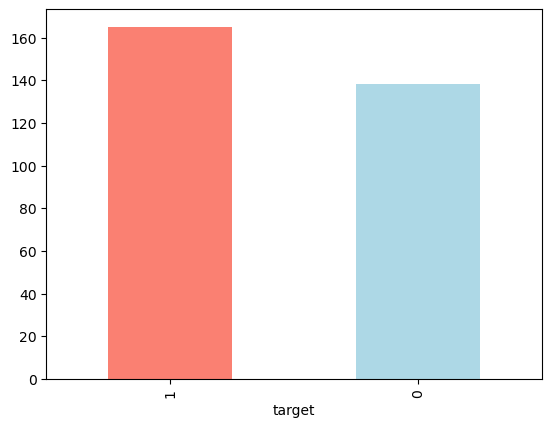

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


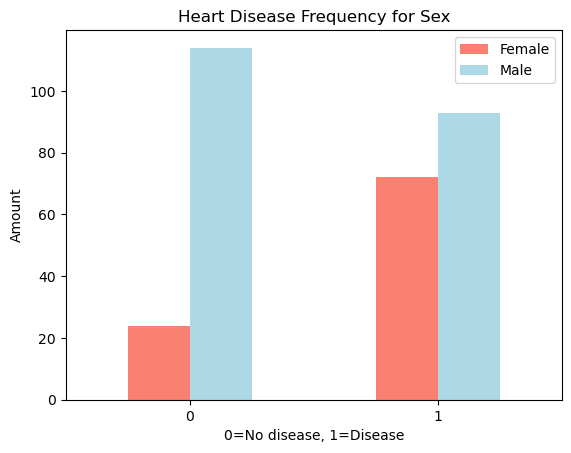

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)
plt.show()

## Age vs Max Heart Rate for Heart disease

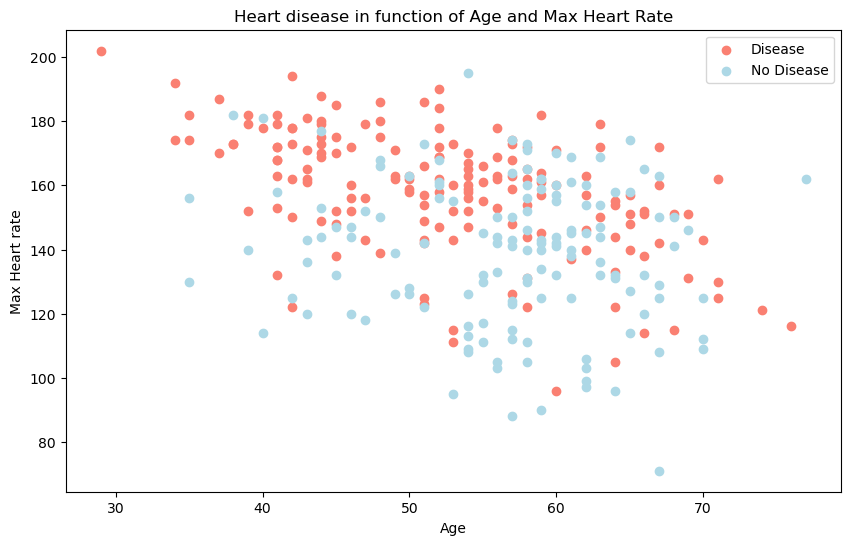

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
           c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","No Disease"])
plt.show();

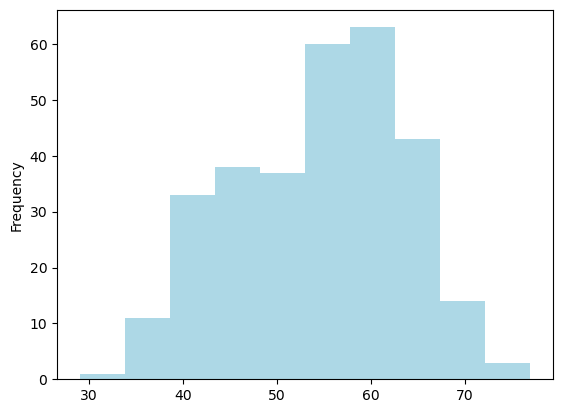

In [12]:
## Check the dist of the age column with a histogram
df.age.plot.hist(color="lightblue");
plt.show()

## Heart disease frequency for each chest pain type


In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


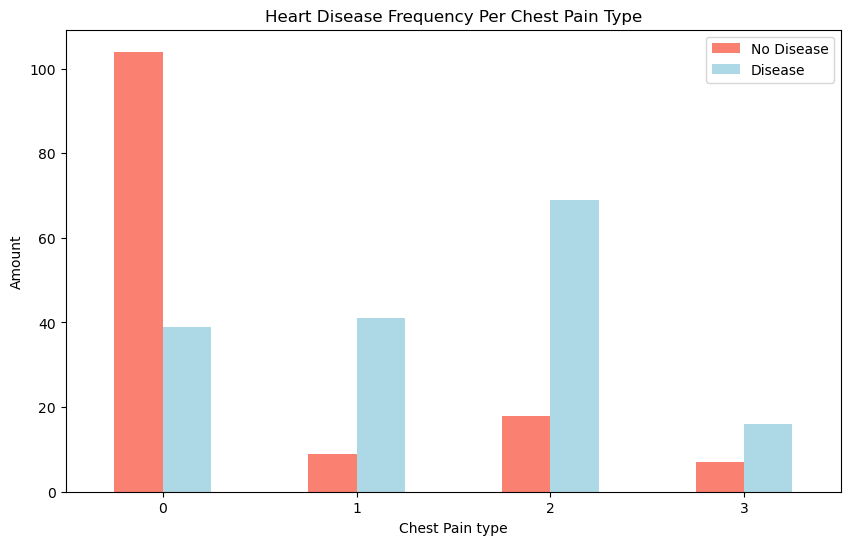

In [14]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


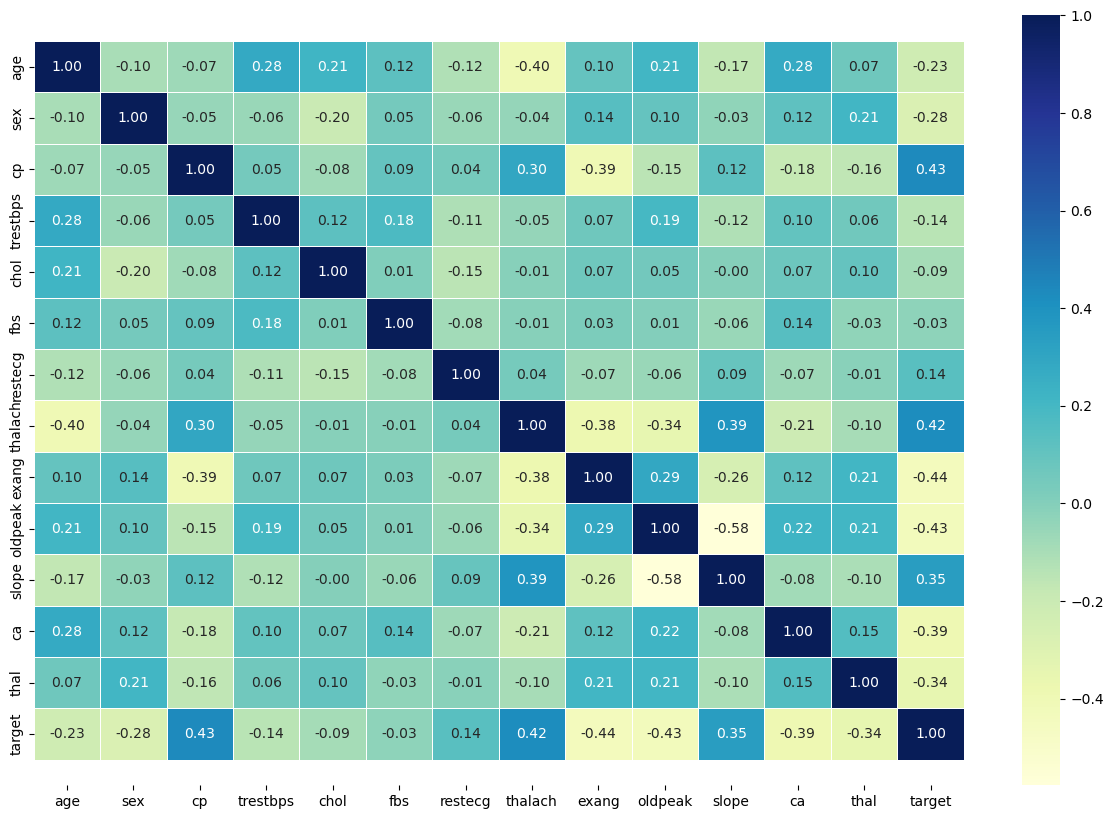

In [17]:
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

## 5.Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X= df.drop("target",axis=1)
y= df["target"]


In [20]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

We are going to try 3 different machine learning models
1. Logistic Regression
2. K-nearest Neighbours Classifier
3. Random Forest Classifer


In [21]:
#put mdoels in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# Create a fn to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    #set random sedd
    np.random.seed(42)
    #Make a dict to keep model scores
    model_scores={}
    #Loop through models
    for name, model in models.items():
        #FIt the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_Scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [22]:
model_scores= fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores
                            

C:\Users\sktmb\Desktop\sample_project_1\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

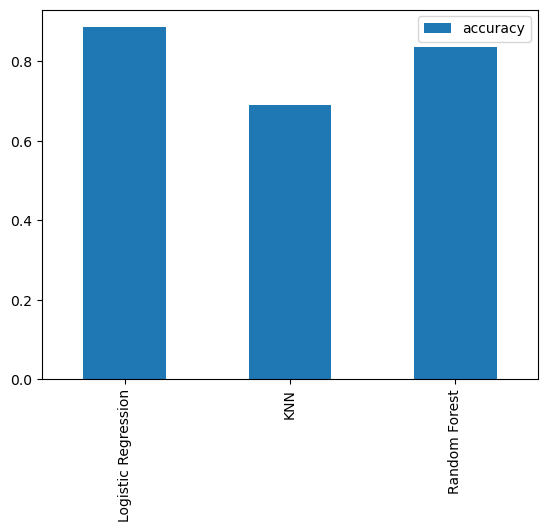

In [23]:
model_compare= pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

now we've got a baseline model..and we know a model's first predictions arent always what we should based out next steps off. what should we do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* AUC

## Hyperparameter tuning

In [24]:
# Lets tune KNN
train_scores=[]
test_scores=[]
#Create a list of diff values of n neighbors
neighbors = range(1,21)
#Set up KNN instance
knn = KNeighborsClassifier()
#Loop through diff n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algo
    knn.fit(X_train,y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


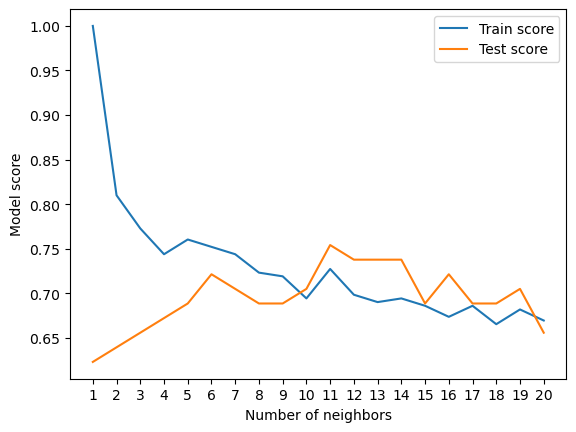

In [27]:
plt.plot(neighbors, train_scores,label="Train score")
plt.plot(neighbors, test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
plt.show()

## Hyperparameter tuning with randomizedsearch CV

We're going to tune:
* LogisticRegression()
* RandomForestCLassifier()
 ... using Randomizedsearch CV

In [28]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid= {"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Creata hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grid setup for each of our models, lets tune them using RandomizedSearchCV..

In [29]:
#Tune Logistic Regression
np.random.seed(42)
#Set up random hyperparameter search for LOgisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparamter search model for logisticregression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [31]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogsiticRegression(), now lets do the same for RandomForestClassifier()...

In [32]:
np.random.seed(42)
#Setup random hyperparameter search for RandomFOrestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#Fit random hyperparameter search model for RandomFOrestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [34]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [35]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSeachCV
Since our LogisticRegression model provides the best scored so far, we'll try and improve them again using GridSearchCV...

In [36]:
## Different hyperparameter for our logisticregression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                                "solver":["liblinear"]}
#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [38]:
#Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* Roc curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

  To make comparisions and evaluate our trained model, first we need to make predicitons


In [39]:
y_preds= gs_log_reg.predict(X_test)

In [40]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

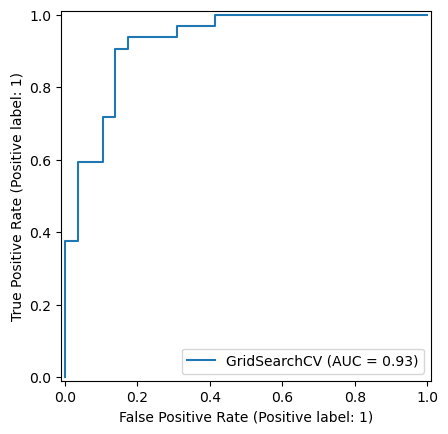

In [41]:
#Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [42]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


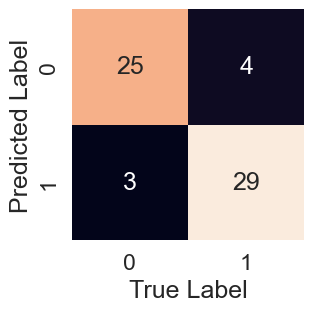

In [43]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test,y_preds)
plt.show()


Now we've got a ROC curve, an AUC metric and a confusion matrix, lets get a classification report as well as cross-validated precision, recall and f1-score

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
We're going to calc precision,recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [45]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [46]:
#Creata a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [48]:
#Cross validated accuracy
cv_acc= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [52]:
#precision
cv_prec = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

np.float64(0.8207936507936507)

In [53]:
#recall
cv_recall = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [54]:
#f1
cv_f1 = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

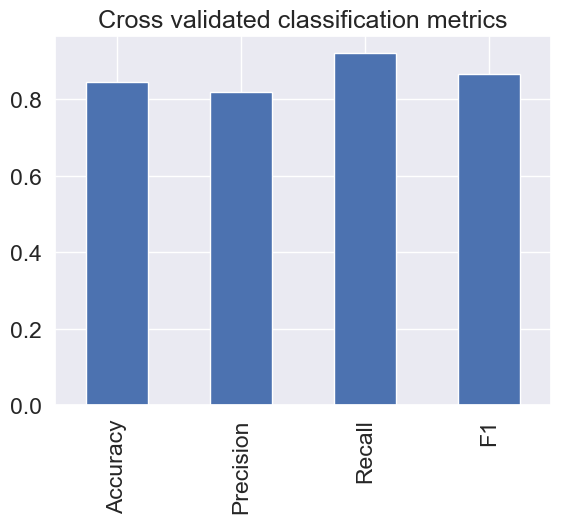

In [57]:
#Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_prec,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                      legend=False)
plt.show()


## Feature imp
another way of asking 'which feature contributed most to the outcomes of the model and how did they contribute?'

Finding feature imp is diff for each machine learning model

In [59]:
#FIt an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [64]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003167280425913024),
 'sex': np.float64(-0.8604465017405314),
 'cp': np.float64(0.6606704375815468),
 'trestbps': np.float64(-0.011569931400895204),
 'chol': np.float64(-0.0016637445504085657),
 'fbs': np.float64(0.04386110683275644),
 'restecg': np.float64(0.3127584216723769),
 'thalach': np.float64(0.024593614040407018),
 'exang': np.float64(-0.6041307979006147),
 'oldpeak': np.float64(-0.5686280785492623),
 'slope': np.float64(0.45051628777983527),
 'ca': np.float64(-0.6360989513753182),
 'thal': np.float64(-0.6766337783287578)}

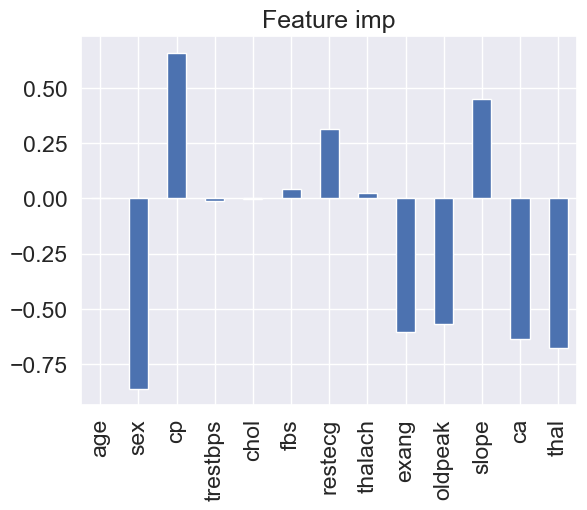

In [65]:
#Visualize feature imp
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature imp",legend=False)
plt.show()

In [67]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [68]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation
if you havent hit your evaluation metric yet...ask yourself..
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?(beyond what we've done so far)
* if your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

